In [2]:
data_str="""Year	Perception of More Crime	Actual Crime
2000	47%	0.65%
2001	41%	3.22%
2002	62%	1.13%
2003	60%	-0.85%
2004	53%	-0.05%
2005	67%	-1.30%
2006	68%	0.75%
2007	71%	-1.02%
2008	67%	-0.86%
2009	74%	-4.47%
2010	66%	-2.37%
2011	68%	-0.60%
2012	64%	-0.49%
2013	63%	-4.05%
2014	70%	-4.80%
2015	70%	-1.91%
2016	68%	0.31%
2017	60%	-3.00%
2018	64%	-5.06%
2019	78%	-4.94%
2020	74%	-5.40%"""
rows = []
for row in data_str.split('\n')[1:]:
    percept = row.split('\t')[1].replace('%', '')
    actual = row.split('\t')[2].replace('%', '')
    year, percept, actual = int(row.split('\t')[0]), float(percept), float(actual)
    rows.append([year, percept, actual])

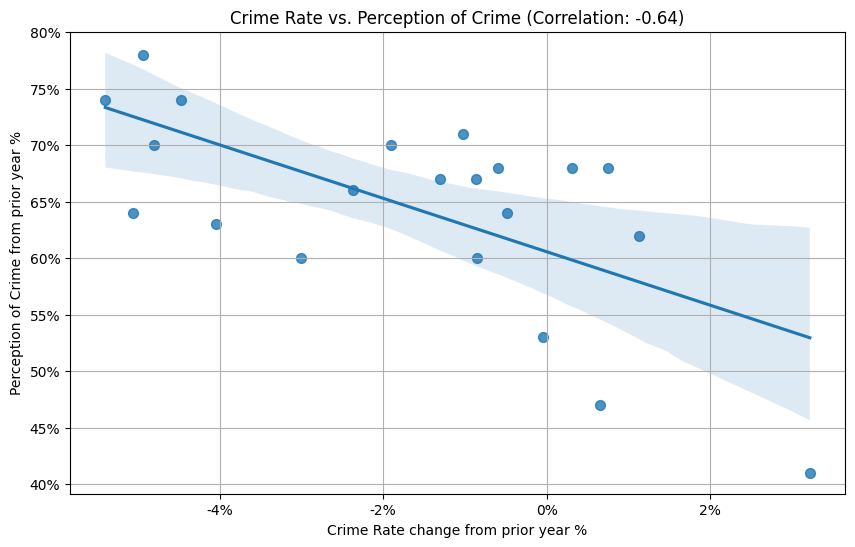

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as mticker
data = pd.DataFrame({
    'year': [x[0] for x in rows],
    'crime_rate': [x[2] for x in rows],
    'perception_of_crime': [x[1] for x in rows]
})

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='crime_rate', y='perception_of_crime', data=data, scatter_kws={'s': 50})

# Calculate Pearson's correlation coefficient and display it on the plot
correlation, _ = stats.pearsonr(data['crime_rate'], data['perception_of_crime'])
plt.title(f'Crime Rate vs. Perception of Crime (Correlation: {correlation:.2f})')
plt.xlabel('Crime Rate change from prior year %')
plt.ylabel('Perception of Crime from prior year %')
def percent_formatter(x, pos):
    return f'{x:.0f}%'

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(percent_formatter))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(percent_formatter))

plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Example dummy data (replace with your actual crime and perception data)
np.random.seed(42)
data = pd.DataFrame({
    'year': [x[0] for x in rows],
    'crime_rate': [x[2] for x in rows],  
    'perception_of_crime': [x[1] for x in rows]
})

# Regression Analysis: Crime Rate as Predictor, Perception as Response
X = sm.add_constant(data['crime_rate'])  # Add a constant (intercept)
y = data['perception_of_crime']

model = sm.OLS(y, X).fit()  # Fit the OLS model
print(model.summary())

# Extracting the coefficient for crime_rate
crime_rate_coefficient = model.params['crime_rate']
print(f"\nCoefficient for crime_rate: {crime_rate_coefficient}")

# Interpretation:
# The coefficient represents the change in perception_of_crime for a one-unit change in crime_rate.
# If the coefficient is negative, it means that as crime_rate increases, perception_of_crime decreases.
# If the coefficient is positive, it means that as crime_rate increases, perception_of_crime increases.

# Example Prediction:
example_crime_rate = 50
predicted_perception = model.predict([1, example_crime_rate])[0]  # [1, example_crime_rate] is needed to add the constant
print(f"\nPredicted perception of crime for crime rate {example_crime_rate}: {predicted_perception}")

# Regression Analysis: Perception as Predictor, Crime Rate as Response
X2 = sm.add_constant(data['perception_of_crime'])
y2 = data['crime_rate']

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

perception_coefficient = model2.params['perception_of_crime']
print(f"\nCoefficient for perception_of_crime: {perception_coefficient}")

example_perception = 100
predicted_crime = model2.predict([1, example_perception])[0]
print(f"\nPredicted crime rate for perception of crime {example_perception}: {predicted_crime}")

                             OLS Regression Results                            
Dep. Variable:     perception_of_crime   R-squared:                       0.416
Model:                             OLS   Adj. R-squared:                  0.385
Method:                  Least Squares   F-statistic:                     13.51
Date:                 Tue, 25 Feb 2025   Prob (F-statistic):            0.00161
Time:                         20:23:51   Log-Likelihood:                -69.372
No. Observations:                   21   AIC:                             142.7
Df Residuals:                       19   BIC:                             144.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.5691      1.854     32.66